In [10]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import *
from pyspark.sql.functions import col
from pyspark.sql.functions import corr

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# Read the CSV file into a DataFrame
df = spark.read.csv("uber-raw-data-aug14.csv", header=True, inferSchema=True)
df.printSchema()
df.show()
print(df.count())

23/05/03 15:57:11 WARN Utils: Your hostname, ali-2.local resolves to a loopback address: 127.0.0.1; using 10.10.20.138 instead (on interface en0)
23/05/03 15:57:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/03 15:57:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.

829275


In [11]:
df.dropna(how='any', thresh=None, subset=None)
df.show()
print(df.count())

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.9516|B02512|
|8/1/2014 0:30:00|40.7433| -73.986|B02512|
|8/1/2014 0:34:00|40.7437|-73.9884|B02512|
|8/1/2014 0:36:00|40.7406|-74.0077|B02512|
+----------

In [12]:
import datetime
import pandas as pd
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import unix_timestamp

df = df.withColumn("timestamp", to_timestamp("Date/Time", "M/d/yyyy H:mm:ss"))
df = df.withColumn("timestamp_int", unix_timestamp("timestamp"))
df.show()
print(df)

+----------------+-------+--------+------+-------------------+-------------+
|       Date/Time|    Lat|     Lon|  Base|          timestamp|timestamp_int|
+----------------+-------+--------+------+-------------------+-------------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|2014-08-01 00:03:00|   1406835180|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|2014-08-01 00:09:00|   1406835540|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|2014-08-01 00:13:00|   1406835780|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|2014-08-01 00:15:00|   1406835900|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|2014-08-01 00:17:00|   1406836020|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|2014-08-01 00:19:00|   1406836140|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|2014-08-01 00:20:00|   1406836200|

[0.7540199924242388, 0.7489147866893763, 0.7141215382856445, 0.712441958690358, 0.7120777786298322, 0.6973092916079848, 0.7134017222140291]


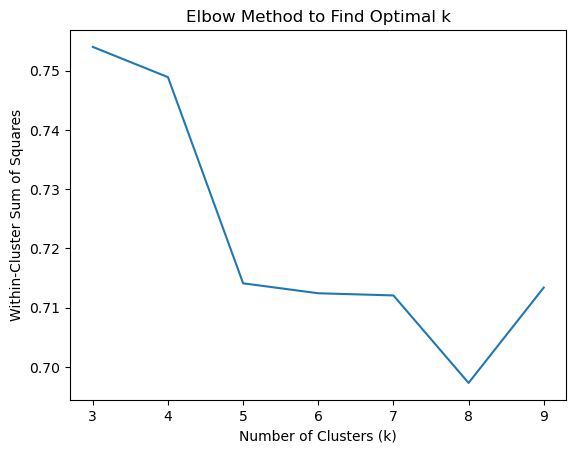

In [23]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
import pandas as pd

assembler = VectorAssembler(inputCols =["timestamp_int", "Lat", "Lon"], outputCol='features')
output = assembler.transform(df)

# Evaluate clustering by computing Within Set Sum of Squared Errors
def computeCost(featuresData, k):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(featuresData)
    predictions = model.transform(featuresData)
    evaluator = ClusteringEvaluator()
    cost = evaluator.evaluate(predictions)
    return cost
  
# Determine the optimal value of k using the elbow method
costs = []
for k in range(3, 10):
    cost = computeCost(output, k)
    costs.append(cost)
print(costs)
import matplotlib.pyplot as plt
plt.plot(range(3, 10), costs)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [14]:
from pyspark.sql.functions import rand

print(output.count())
first_data, set_test_stream = output.randomSplit([0.8, 0.2], seed=42)
print(first_data.count(),set_test_stream.count())


829275


663586 165689


In [24]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml.evaluation import ClusteringEvaluator
import pickle 

# Train the model on the training set
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(first_data)
model.save("Kmodel2")

23/05/03 16:30:11 WARN MemoryStore: Not enough space to cache rdd_3278_1 in memory! (computed 3.7 MiB so far)
23/05/03 16:30:11 WARN MemoryStore: Not enough space to cache rdd_3278_5 in memory! (computed 5.6 MiB so far)
23/05/03 16:30:11 WARN MemoryStore: Not enough space to cache rdd_3278_0 in memory! (computed 5.6 MiB so far)
23/05/03 16:30:11 WARN MemoryStore: Not enough space to cache rdd_3278_2 in memory! (computed 2.5 MiB so far)
23/05/03 16:30:11 WARN MemoryStore: Not enough space to cache rdd_3278_4 in memory! (computed 1028.2 KiB so far)
23/05/03 16:30:11 WARN BlockManager: Persisting block rdd_3278_0 to disk instead.
23/05/03 16:30:11 WARN BlockManager: Persisting block rdd_3278_2 to disk instead.
23/05/03 16:30:11 WARN BlockManager: Persisting block rdd_3278_5 to disk instead.
23/05/03 16:30:11 WARN BlockManager: Persisting block rdd_3278_4 to disk instead.
23/05/03 16:30:11 WARN BlockManager: Persisting block rdd_3278_1 to disk instead.


In [25]:

set_test_stream.printSchema()
df = set_test_stream.drop(col("features"))
df.coalesce(1).write.option("header",True).csv("testData2")

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestamp_int: long (nullable = true)
 |-- features: vector (nullable = true)



In [27]:
from kafka import KafkaProducer
import json
import random
import csv
import time

producer = KafkaProducer(bootstrap_servers='localhost:9092')

with open('testData2/part-00000-a8ac1455-d057-4fa4-9cbd-9174c4945fcb-c000.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        message = ','.join(row)
        producer.send('test', message.encode('utf-8'))

producer.flush() 
